In [72]:
# set up working catalog
import sys
from pathlib import Path
project_path = str(Path().cwd().parent.parent.resolve())
if project_path not in sys.path:
    sys.path.append(project_path)

# imports
from common.utils import get_numeric_data, show_polynomial_plts

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [73]:
data = get_numeric_data()
data

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,122.0,127.3,20,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,160.0,142.5,19,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,122.0,124.8,19,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,122.0,119.6,20,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,100.0,141.5,45,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,125.0,122.2,19,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
4420,120.0,119.0,18,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02
4421,154.0,149.5,30,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79
4422,180.0,153.8,20,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12


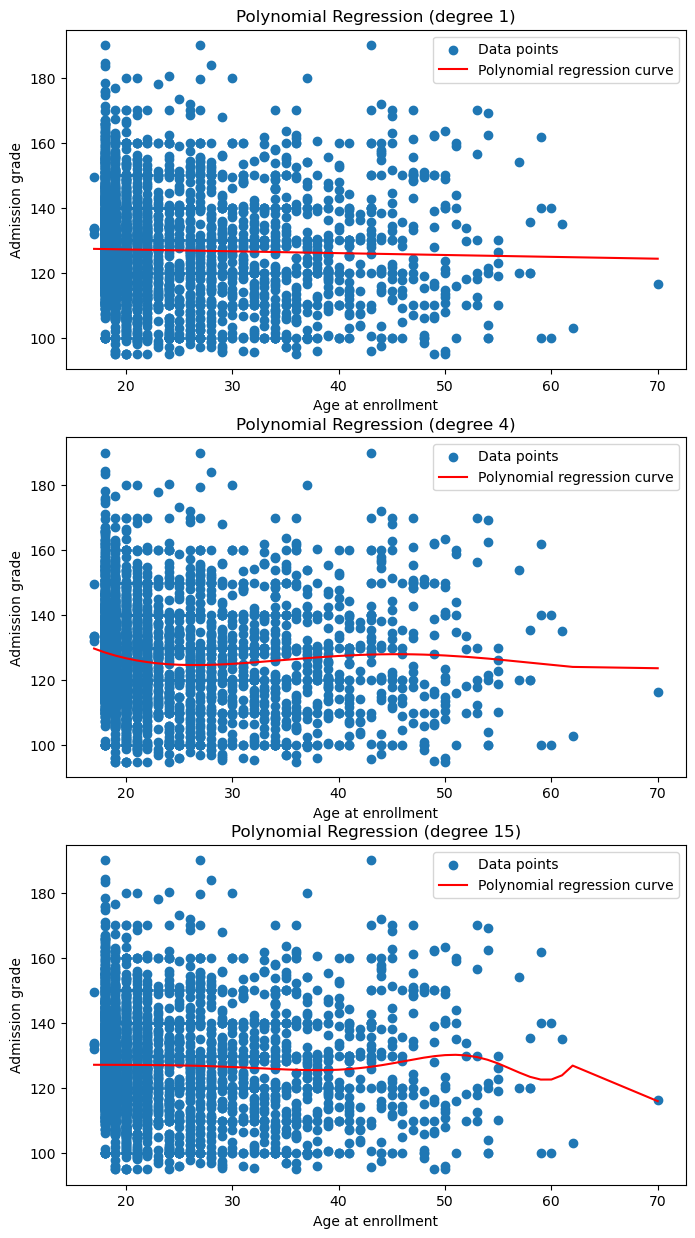

In [74]:
X = data["Age at enrollment"]
y = data["Admission grade"]
show_polynomial_plts(X, y, degrees = [1, 4, 15], x_title="Age at enrollment", y_title="Admission grade")

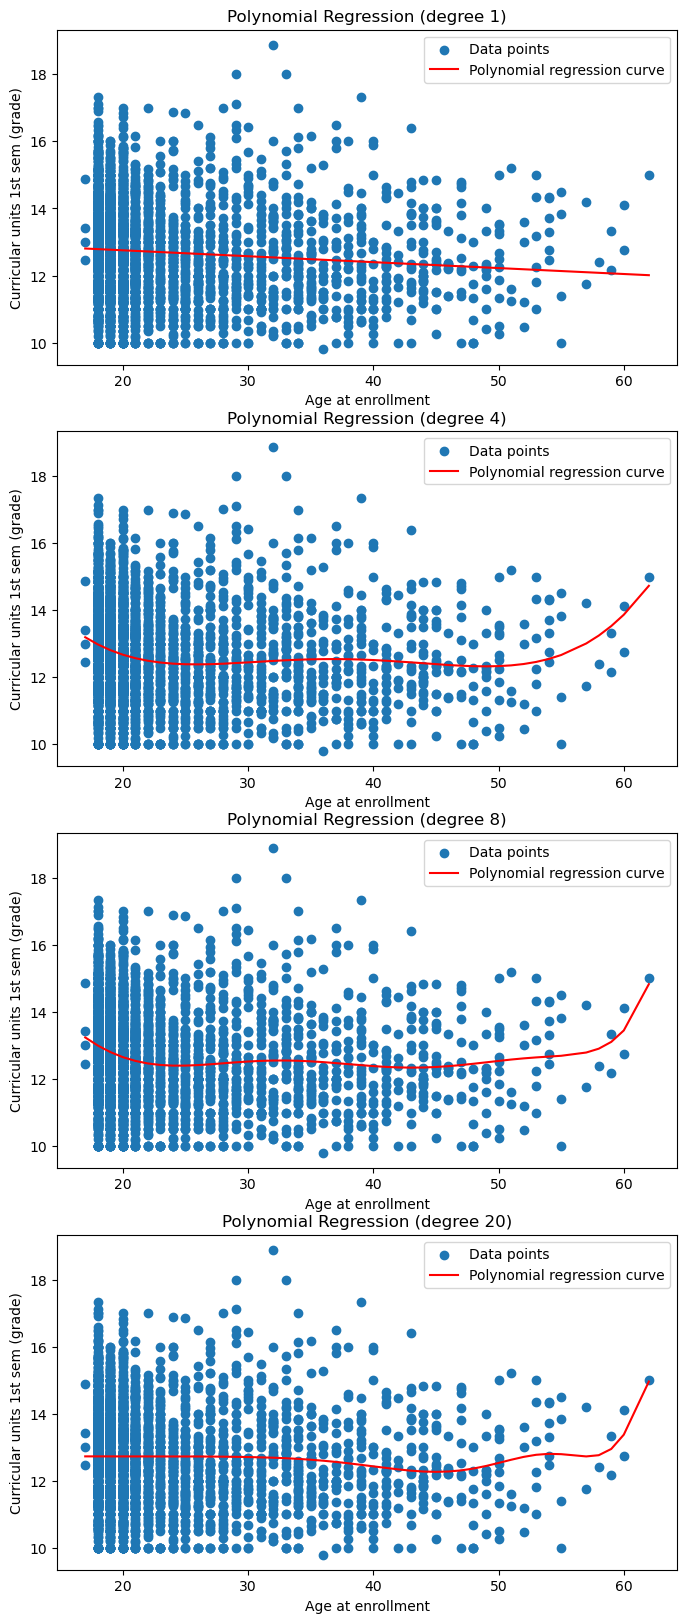

In [75]:
data_filtered = data[data["Curricular units 1st sem (grade)"] != 0]
X = data_filtered["Age at enrollment"]
y = data_filtered["Curricular units 1st sem (grade)"]
show_polynomial_plts(X, y, degrees = [1, 4, 8, 20], x_title="Age at enrollment", y_title="Curricular units 1st sem (grade)")

# Number of features

In [76]:
model = LinearRegression()
poly = PolynomialFeatures(degree=4)

def test_number_of_features(X, y):
    X_poly = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=6)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    

In [77]:
X = data[["Age at enrollment"]]
y = data["Admission grade"]
test_number_of_features(X, y)

MSE: 210.36651970546285


In [78]:
X = data[["Age at enrollment", "GDP", "Unemployment rate", "Inflation rate"]]
y = data["Admission grade"]
test_number_of_features(X, y)

MSE: 204.53384585605045


In [79]:
X = data[["Age at enrollment", "GDP", "Unemployment rate", "Inflation rate", "Previous qualification (grade)"]]
y = data["Admission grade"]
test_number_of_features(X, y)

MSE: 128.47980653573072


In [85]:
X = data[["Age at enrollment", "GDP", "Unemployment rate", "Inflation rate",
    "Curricular units 1st sem (approved)", "Curricular units 1st sem (grade)"]]
y = data["Admission grade"]
test_number_of_features(X, y)

MSE: 209.80945784834478


In [86]:
X = data[["Age at enrollment", "GDP", "Unemployment rate", "Inflation rate",
    "Curricular units 1st sem (approved)", "Curricular units 1st sem (grade)",
    "Previous qualification (grade)"]]
y = data["Admission grade"]
test_number_of_features(X, y)

MSE: 150.03498519347485


In [89]:
X = data.drop(columns=["Admission grade"])
y = data["Admission grade"]
test_number_of_features(X, y)
# overfitted strongly

MSE: 1607754505.2461731


TODO: gradient descent -> loss function cost 